In [62]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import pickle
import codecs
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 25) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [63]:
df = pd.read_csv("../common/dataset.csv")
df_t = df[['DEFAULT PAYMENT JAN','CUST_COD']]

df = df.set_index(['CUST_COD'], drop=True)
df = df.drop("DEFAULT PAYMENT JAN",1)
df.index.name = None

df_t = df_t.set_index(['CUST_COD'], drop=True)
df_t.index.name = None

df_real = df.copy()

In [64]:
print df_real.shape
#df_real.head(30)

(26884, 23)


In [65]:
print df_t.shape
df_t.head()

(26884, 1)


,DEFAULT PAYMENT JAN
53613503,0
35524089,1
58777007,0
26913418,0
41993633,1


test_1 = df.head(24)
fig, axarr = plt.subplots(8, 3,figsize=(90, 150))
fig.suptitle("TEST", fontsize=40)

x = np.arange(6)
for index,b in enumerate(test_1.iterrows()):
    bill_amt = []
    i = index%8
    j = index%3
    bill_amt.append(b[1][11])
    bill_amt.append(b[1][12])
    bill_amt.append(b[1][13])
    bill_amt.append(b[1][14])
    bill_amt.append(b[1][15])
    bill_amt.append(b[1][16])
    
    axarr[i,j].scatter(x,bill_amt)
    axarr[i,j].plot(x,bill_amt)
    axarr[i,j].set_title(str(index), size=30)
    
for index,p in enumerate(test_1.iterrows()):
    pay_amt = []
    i = index%8
    j = index%3
    pay_amt.append(p[1][17])
    pay_amt.append(p[1][18])
    pay_amt.append(p[1][19])
    pay_amt.append(p[1][20])
    pay_amt.append(p[1][21])
    pay_amt.append(p[1][22])
    
    axarr[i,j].scatter(x,pay_amt)
    axarr[i,j].plot(x,pay_amt)

plt.show()

In [126]:
SAMPLE = 12696362
#df = df.loc[[SAMPLE]]
df = df_real
dt = df_t
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
colors = {0:'r', 1:'b'}

In [127]:
df1["SHOP_JUL"] = df.apply(lambda row : row["BILL_AMT_JUL"] - 0 - row["PAY_AMT_JUL"], axis=1)
df1["SHOP_AUG"] = df.apply(lambda row : row["BILL_AMT_AUG"] - row["BILL_AMT_JUL"] + row["PAY_AMT_AUG"], axis=1)
df1["SHOP_SEP"] = df.apply(lambda row : row["BILL_AMT_SEP"] - row["BILL_AMT_AUG"] + row["PAY_AMT_SEP"], axis=1)
df1["SHOP_OCT"] = df.apply(lambda row : row["BILL_AMT_OCT"] - row["BILL_AMT_SEP"] + row["PAY_AMT_OCT"], axis=1)
df1["SHOP_NOV"] = df.apply(lambda row : row["BILL_AMT_NOV"] - row["BILL_AMT_OCT"] + row["PAY_AMT_NOV"], axis=1)
df1["SHOP_DEC"] = df.apply(lambda row : row["BILL_AMT_DEC"] - row["BILL_AMT_NOV"] + row["PAY_AMT_DEC"], axis=1)

In [128]:
#this columns contain for each month the difference between how much the person has spent and how much has repaid
# USCITE AL NETTO DEI REPAY
df2["SHOP_JUL_NET"] = df1.apply(lambda row : row["SHOP_JUL"] - row["PAY_AMT_JUL"], axis=1)
df2["SHOP_AUG_NET"] = df1.apply(lambda row : row["SHOP_AUG"] - row["PAY_AMT_AUG"], axis=1)
df2["SHOP_SEP_NET"] = df1.apply(lambda row : row["SHOP_SEP"] - row["PAY_AMT_SEP"], axis=1)
df2["SHOP_OCT_NET"] = df1.apply(lambda row : row["SHOP_OCT"] - row["PAY_AMT_OCT"], axis=1)
df2["SHOP_NOV_NET"] = df1.apply(lambda row : row["SHOP_NOV"] - row["PAY_AMT_NOV"], axis=1)
df2["SHOP_DEC_NET"] = df1.apply(lambda row : row["SHOP_DEC"] - row["PAY_AMT_DEC"], axis=1)

In [129]:
# NOW WE CAN ALSO DIVIDE EACH NET VALUE FOR THE LIMIT BALL !

df3["SHOP_JUL_NET"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_AUG_NET"] = df2.apply(lambda row : ( row["SHOP_AUG_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_SEP_NET"] = df2.apply(lambda row : ( row["SHOP_SEP_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_OCT_NET"] = df2.apply(lambda row : ( row["SHOP_OCT_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_NOV_NET"] = df2.apply(lambda row : ( row["SHOP_NOV_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_DEC_NET"] = df2.apply(lambda row : ( row["SHOP_DEC_NET"] ) / row["LIMIT_BAL"], axis=1)

In [130]:
df1 = df1[df1.columns[-6:]]
df2 = df2[df2.columns[-6:]]
df3 = df3[df3.columns[-6:]]
df1["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df2["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df3["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df1["TARGET"] = df1["TARGET"].apply(lambda x: colors[x])
df2["TARGET"] = df2["TARGET"].apply(lambda x: colors[x])
df3["TARGET"] = df3["TARGET"].apply(lambda x: colors[x])

In [131]:
print df1.shape
#df1.round(3)

(26884, 7)


In [132]:
print df2.shape
#df2.round(3)

(26884, 7)


In [133]:
print df3.shape
#df3.round(3)

(26884, 7)


x = np.arange(6)

bill_amt = []
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 16].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 15].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 14].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 13].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 12].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 11].values[0])
plt.scatter(x, bill_amt)
plt.plot(x, bill_amt, label='BILL_AMT')
    
pay_amt = []
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 22].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 21].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 20].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 19].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 18].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 17].values[0])
plt.scatter(x, pay_amt)
plt.plot(x, pay_amt, label='PAY_AMT') 

pl.xlabel("MONTH")
pl.legend(loc='upper left')

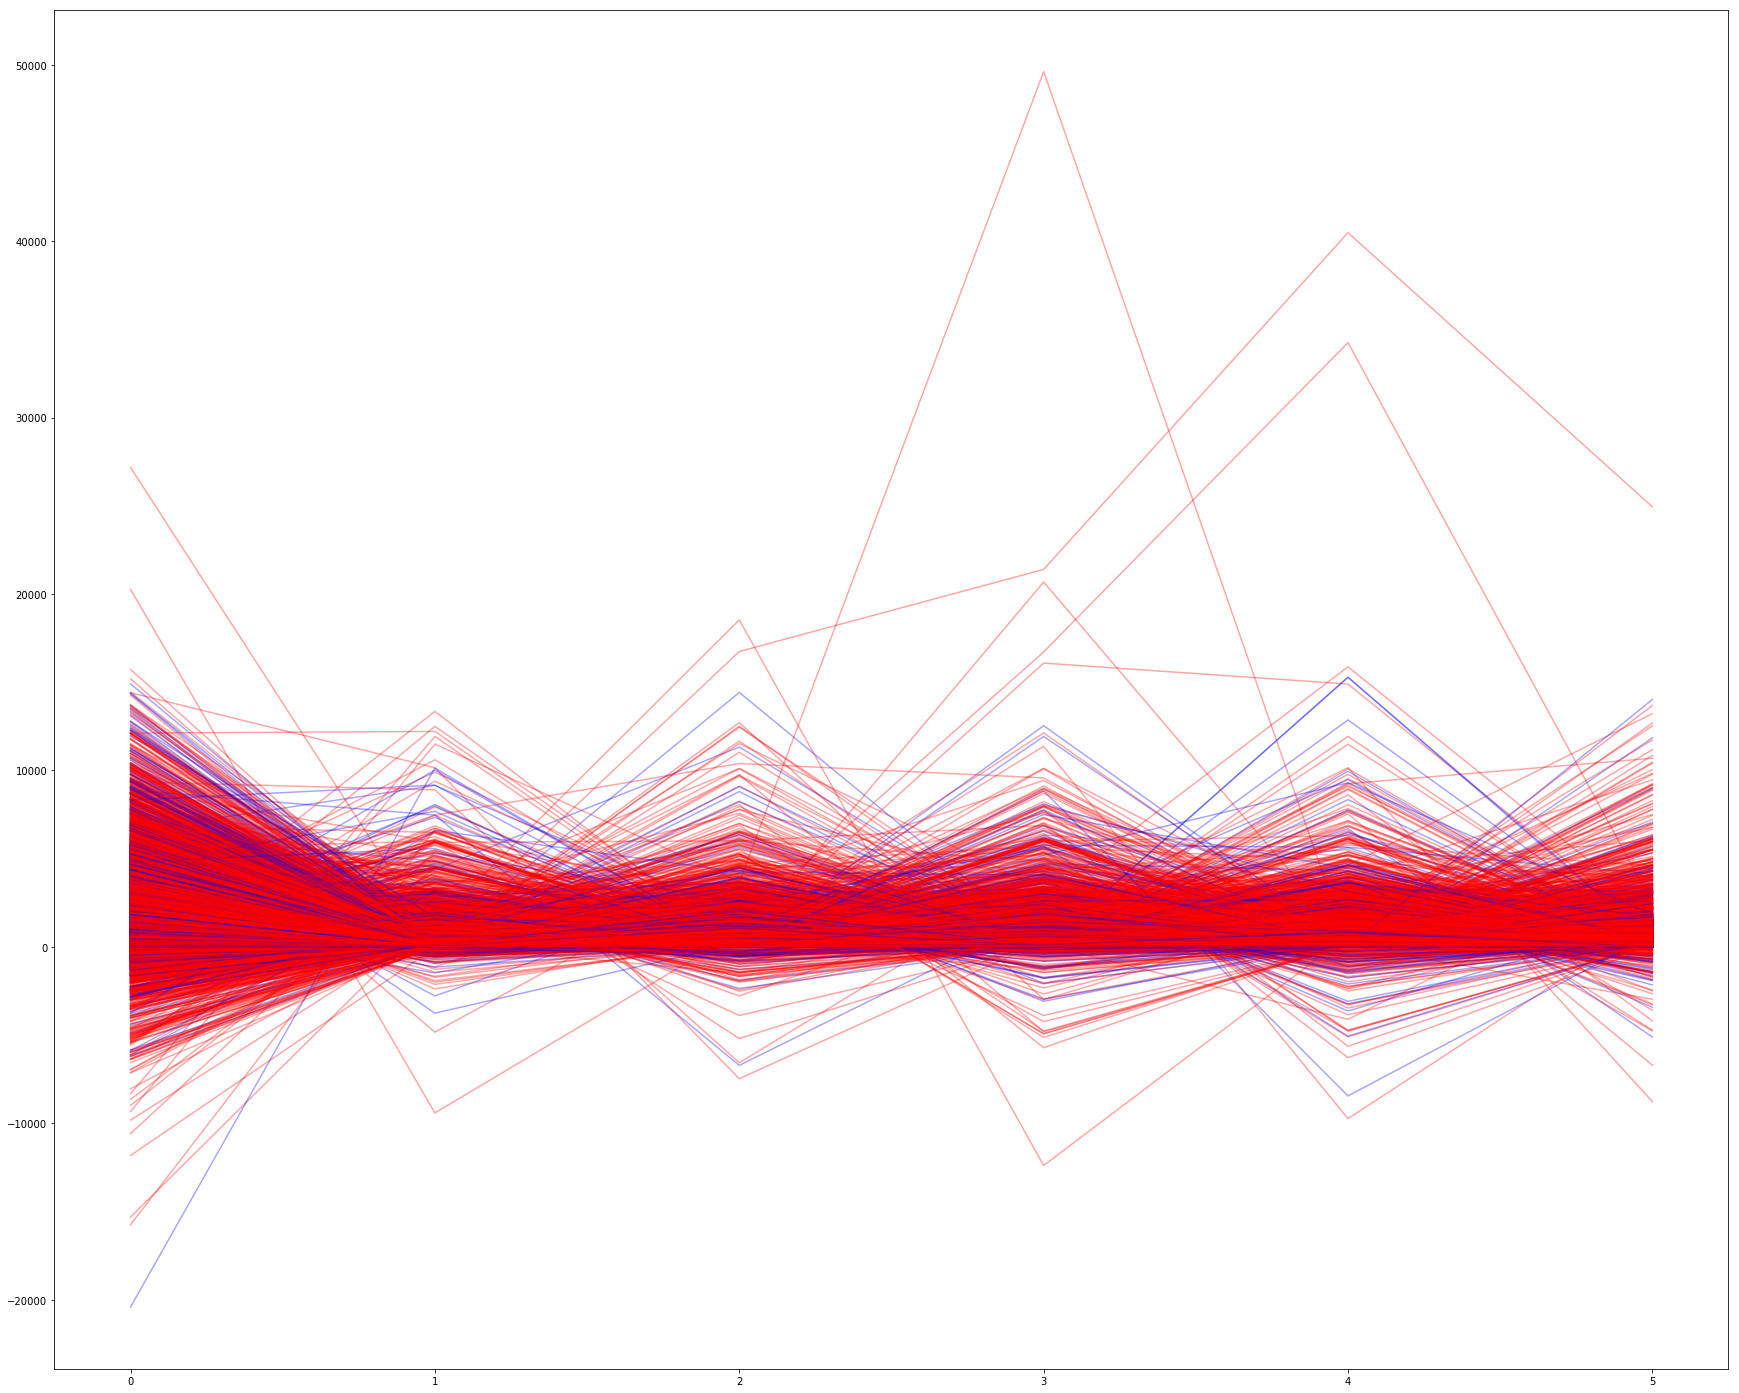

In [134]:
x = np.arange(6)
for SAMPLE in df1.index:
    outgoing_amt = []
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt)
    plt.plot(x, outgoing_amt, c=df1.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=0.35)

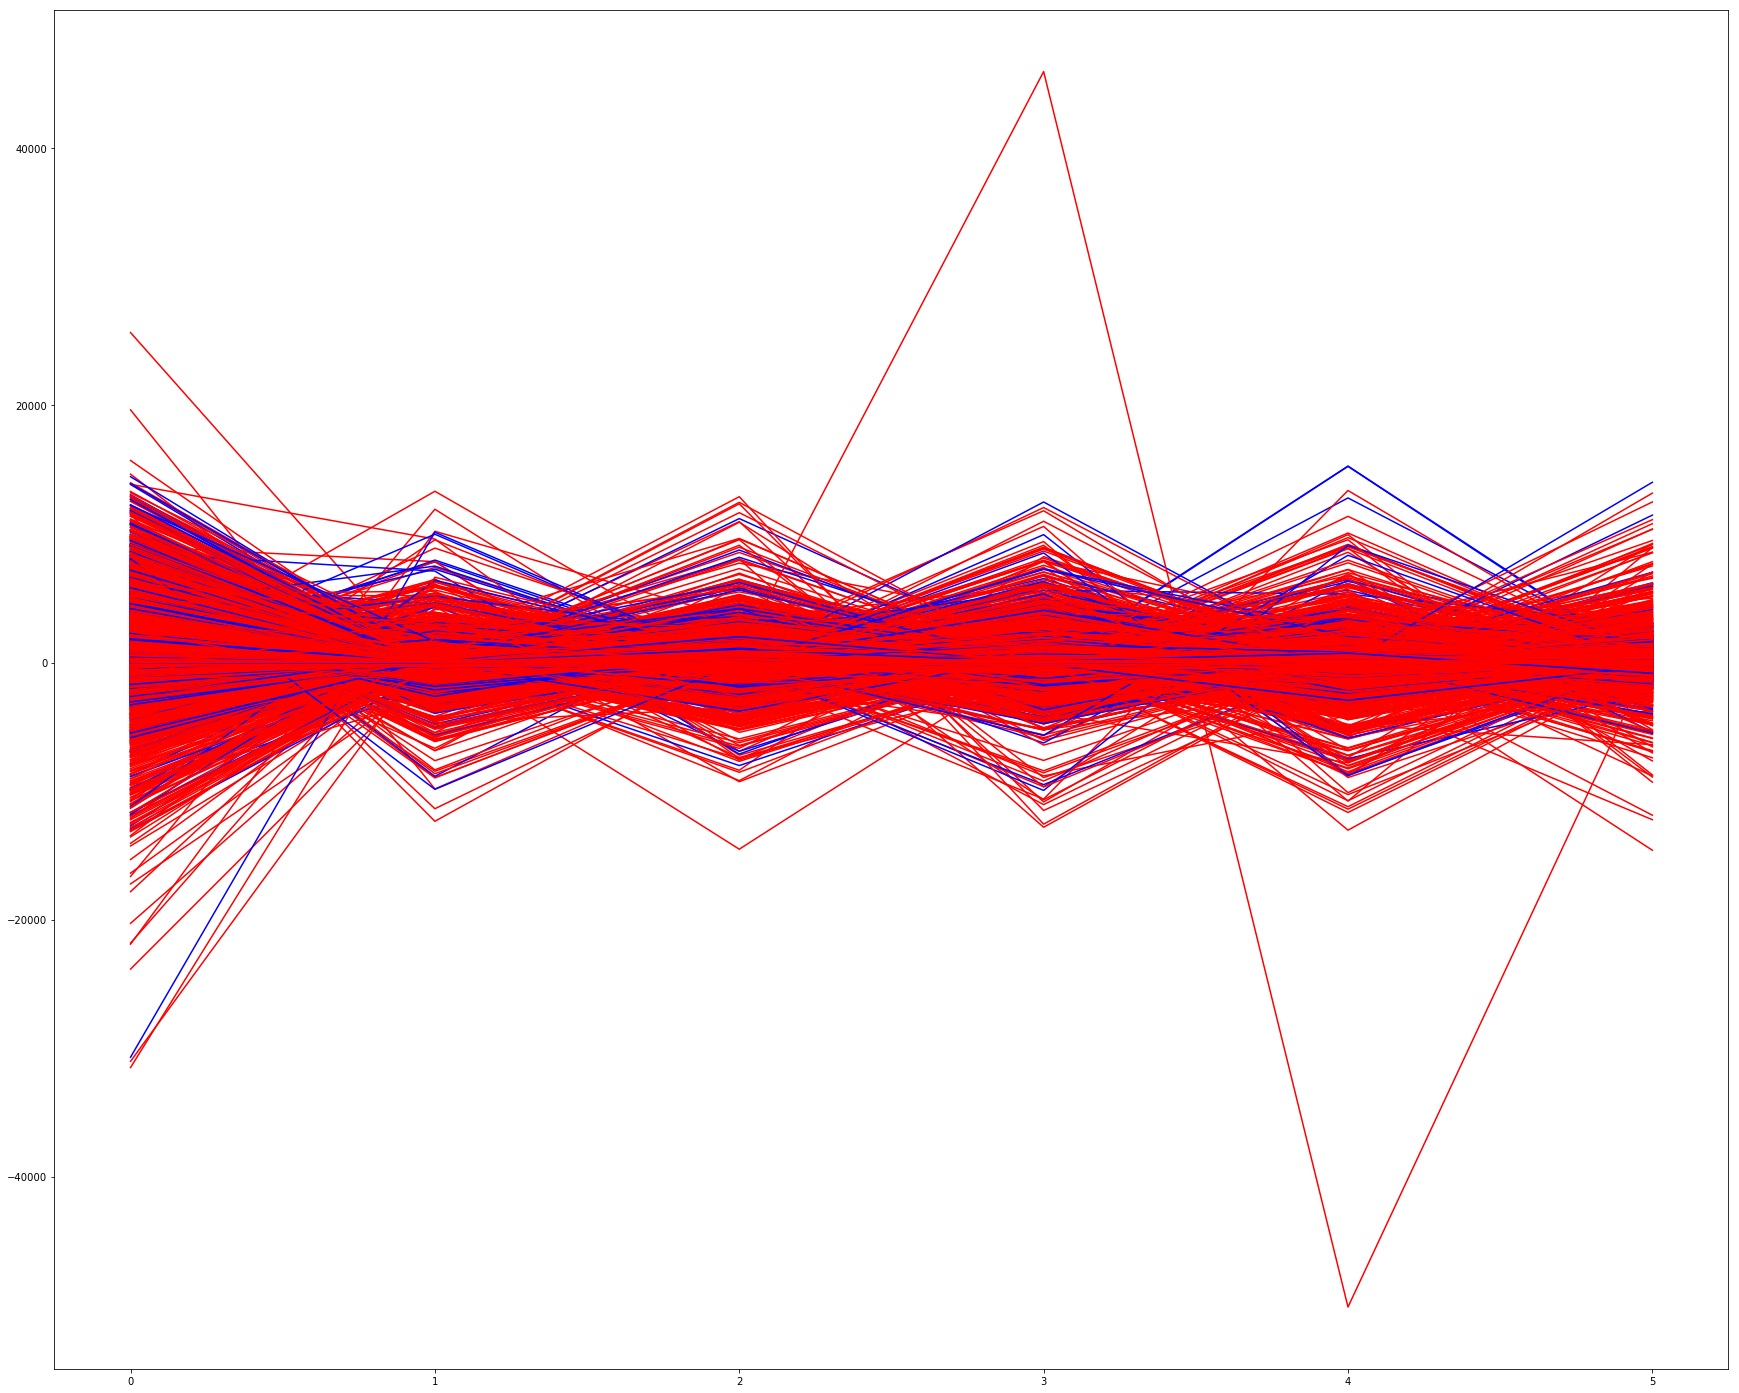

In [135]:
for SAMPLE in df2.index:
    outgoing_amt_net = []
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net)
    plt.plot(x, outgoing_amt_net, c=df1.loc[[SAMPLE]].iloc[:, 6].values[0])
    #pl.xlabel("MONTH")

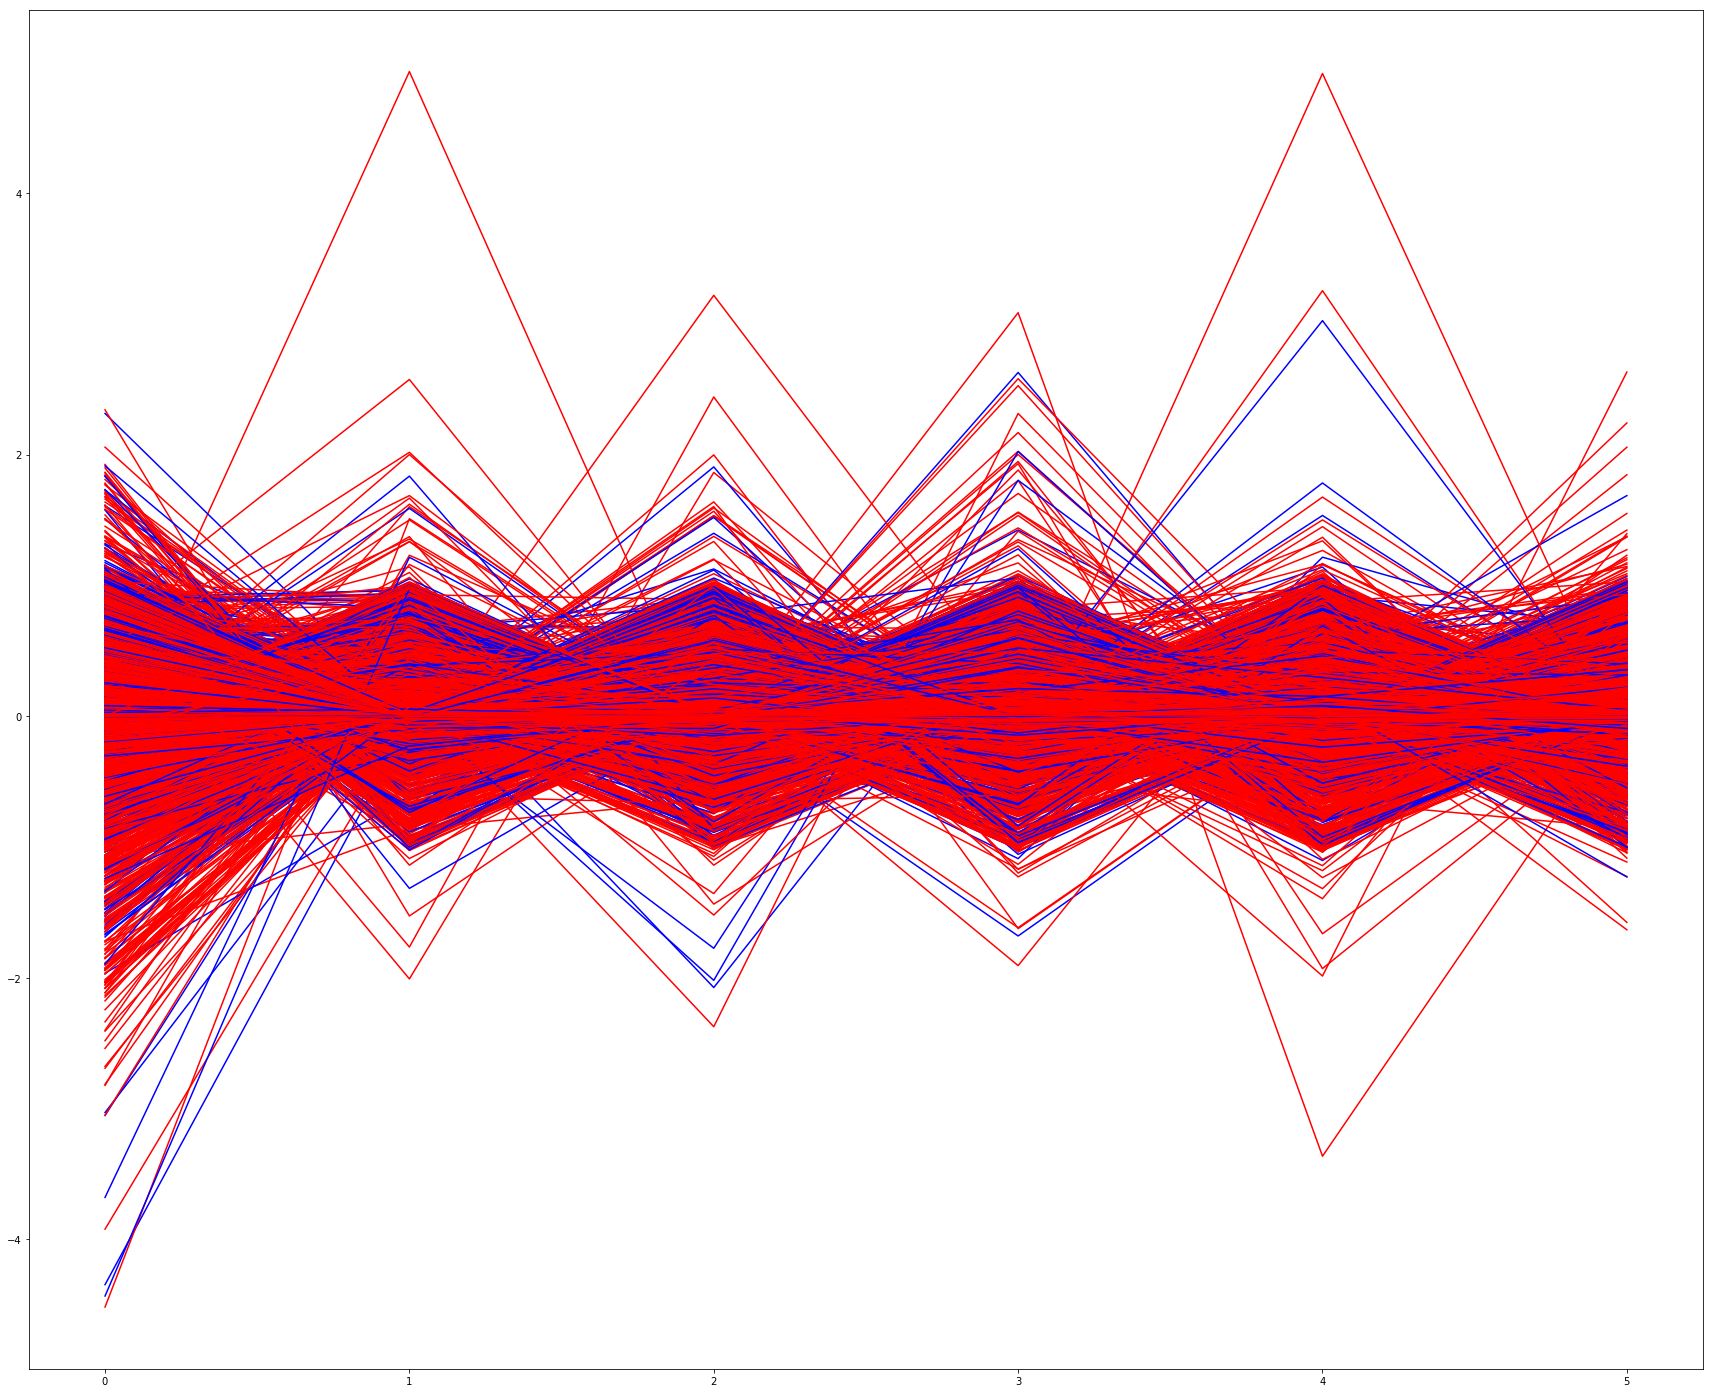

In [136]:
for SAMPLE in df3.index:
    outgoing_amt_net_norm = []
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, outgoing_amt_net_norm, c=df1.loc[[SAMPLE]].iloc[:, 6].values[0])
    #pl.xlabel("MONTH")